In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
from sklearn.tree import export_graphviz
import imblearn


In [2]:
#We start working with the clean dataset

In [3]:
df = pd.read_csv('data/0.NaNs/df_0_oh.csv')

In [4]:
# df.fillna(0) -> not necessary because there are no nan

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


# OUTLIERS

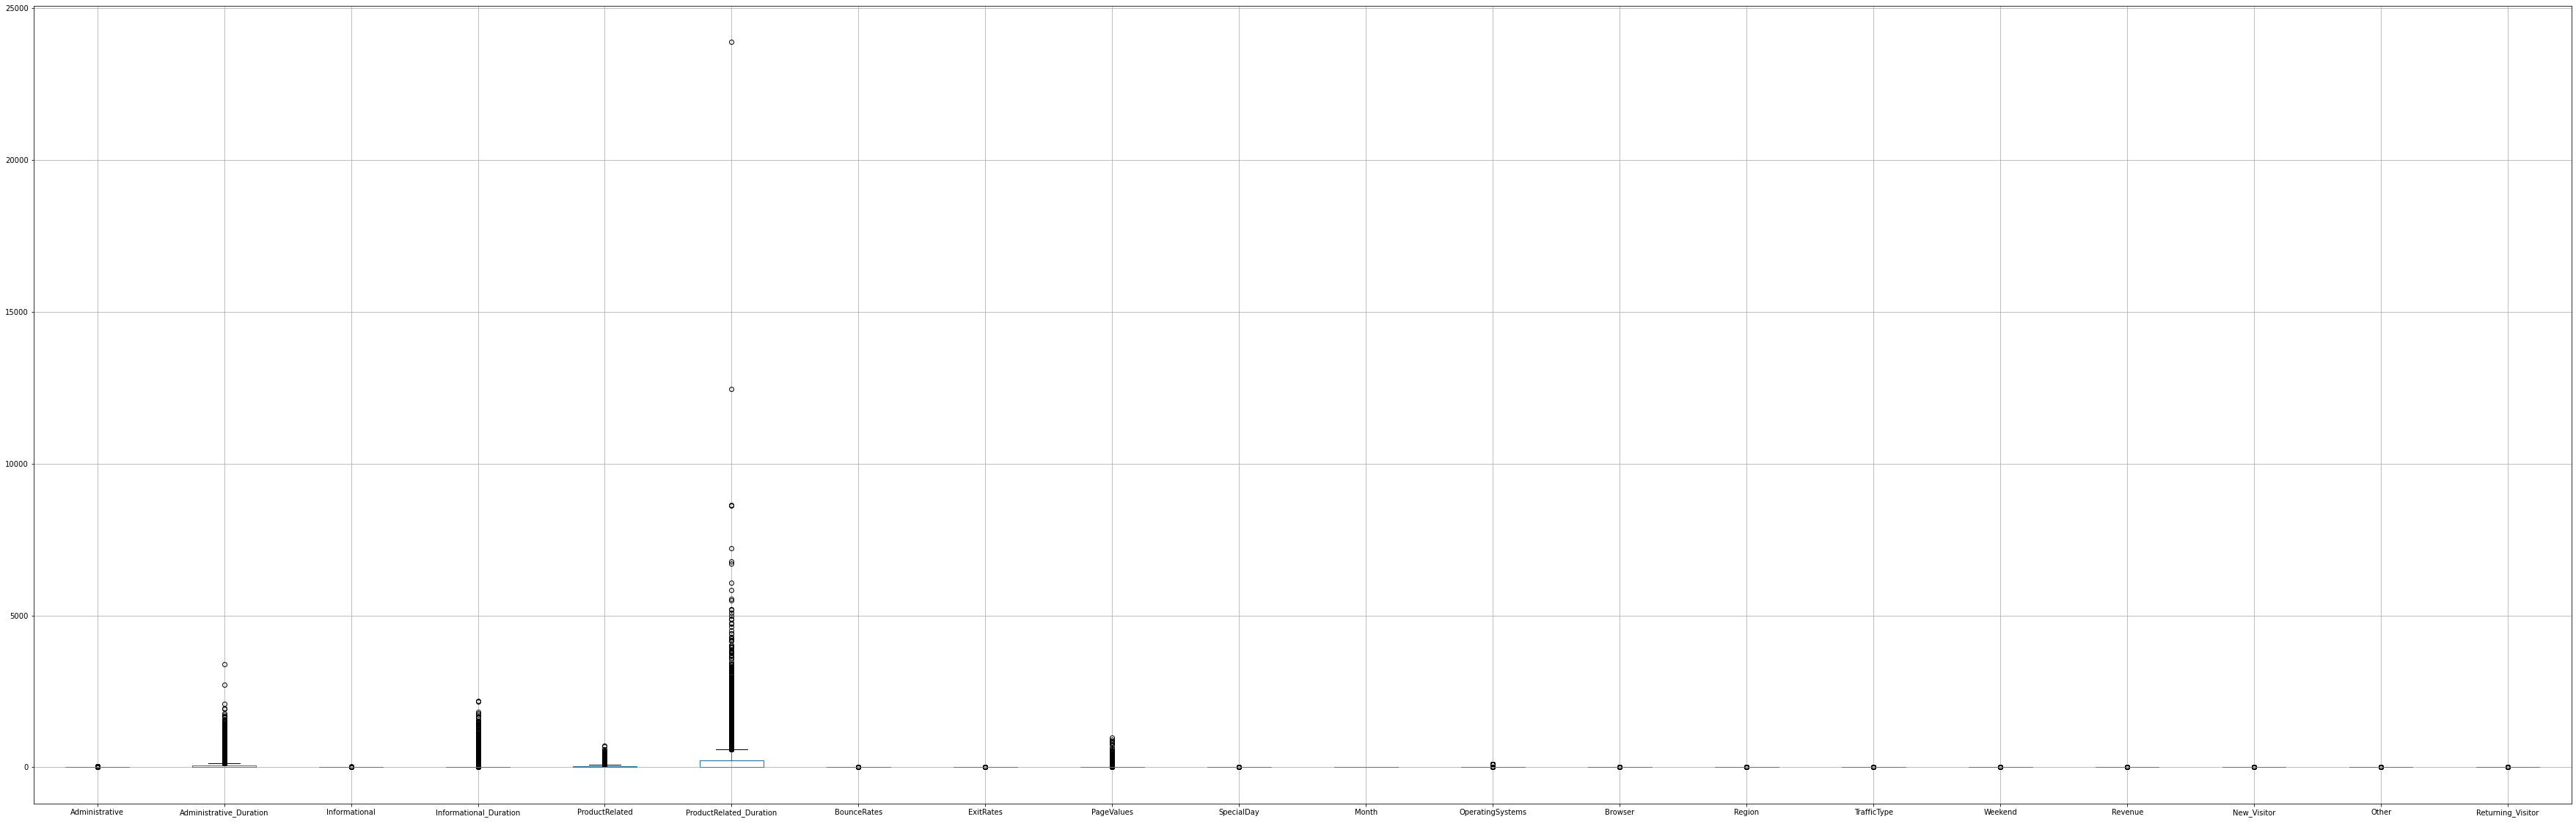

In [6]:
plt.figure(figsize=(62,20))
df.boxplot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12304 entries, 0 to 12303
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12304 non-null  float64
 1   Administrative_Duration  12304 non-null  float64
 2   Informational            12304 non-null  float64
 3   Informational_Duration   12304 non-null  float64
 4   ProductRelated           12304 non-null  float64
 5   ProductRelated_Duration  12304 non-null  float64
 6   BounceRates              12304 non-null  float64
 7   ExitRates                12304 non-null  float64
 8   PageValues               12304 non-null  float64
 9   SpecialDay               12304 non-null  float64
 10  Month                    12304 non-null  int64  
 11  OperatingSystems         12304 non-null  float64
 12  Browser                  12304 non-null  int64  
 13  Region                   12304 non-null  int64  
 14  TrafficType           

In [8]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

In [9]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in num_col:
    data_mean, data_std = mean(df[i]), std(df[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 215
Non-outlier observations: 12089
Percent of outlers: 1.74739921976593 

Informational_Duration : 

Identified outliers: 228
Non-outlier observations: 12076
Percent of outlers: 1.8530559167750327 

ProductRelated_Duration : 

Identified outliers: 242
Non-outlier observations: 12062
Percent of outlers: 1.9668400520156046 

BounceRates : 

Identified outliers: 705
Non-outlier observations: 11599
Percent of outlers: 5.729843953185956 

ExitRates : 

Identified outliers: 709
Non-outlier observations: 11595
Percent of outlers: 5.762353706111833 

PageValues : 

Identified outliers: 69
Non-outlier observations: 12235
Percent of outlers: 0.5607932379713915 



In [10]:
Outliers=pd.DataFrame({'Feature':num_col,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.762354
3,BounceRates,5.729844
2,ProductRelated_Duration,1.966840
1,Informational_Duration,1.853056
0,Administrative_Duration,1.747399
5,PageValues,0.560793


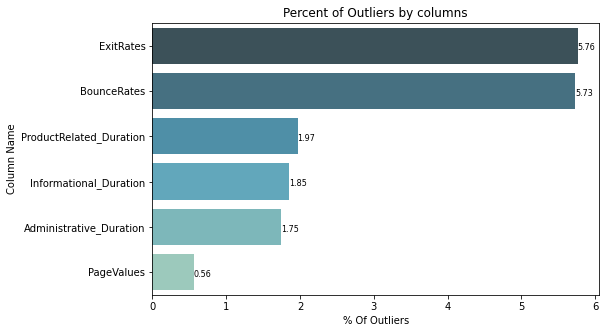

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb56756e0a0>,
      dtype=object)

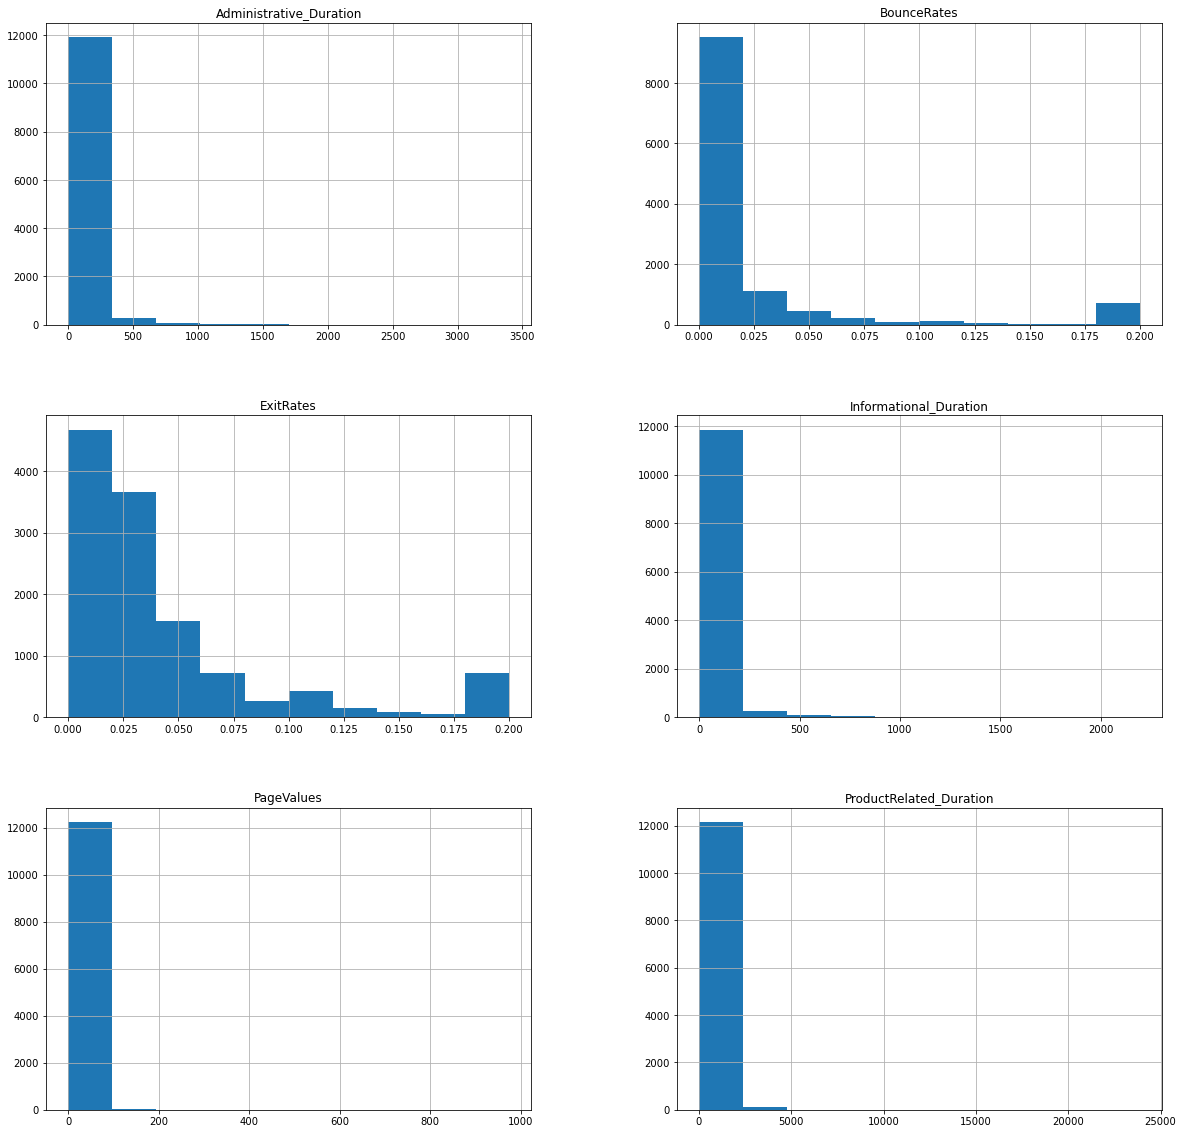

In [12]:
df.hist(column=num_col,figsize=(20,20))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
data =df[["ExitRates","BounceRates","Informational_Duration","Administrative_Duration","ProductRelated_Duration","PageValues"]].fillna(0)
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)

StandardScaler()
[4.30112258e-02 2.21674394e-02 2.80609192e+01 5.22946562e+01
 2.39979478e+02 2.25491020e+00]


In [15]:
print(scaler.transform(data))

[[ 3.23379121  3.6708286  -0.23213374 -0.381454   -0.40795767 -0.07453257]
 [ 1.1739043  -0.45758139 -0.23213374 -0.381454   -0.29915966 -0.07453257]
 [ 3.23379121  3.6708286  -0.24040623 -0.38874832 -0.40965764 -0.07453257]
 ...
 [ 0.0168849  -0.07276621 -0.23213374 -0.381454   -0.40795767 -0.04577116]
 [-0.59346956 -0.22938696 -0.23213374 -0.381454   -0.40795767 -0.07453257]
 [-0.69344628 -0.41424588  0.81433653 -0.381454   -0.40795767 -0.07453257]]


In [16]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [18]:
scaler = MinMaxScaler()
X=df[["ExitRates","BounceRates","Informational_Duration","Administrative_Duration","ProductRelated_Duration","PageValues"]].fillna(0)

In [19]:
col=["BounceRates","Informational_Duration","Administrative_Duration","ProductRelated_Duration","PageValues"]

In [20]:
def minmaxscaler(list_):
    list_ = np.array(list_).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(list_)
    scaled_list = scaler.transform(list_)
    return list(scaled_list.reshape(-1))

In [21]:
col

['BounceRates',
 'Informational_Duration',
 'Administrative_Duration',
 'ProductRelated_Duration',
 'PageValues']

In [22]:
for i in col:
    df.loc[:, i] = minmaxscaler(df[i].to_list())

In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.000294,0.0,0.000455,1.0,0.000042,1.00,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.000294,0.0,0.000455,2.0,0.002721,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,0.000000,0.0,0.000000,1.0,0.000000,1.00,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.000294,0.0,0.000455,2.0,0.000042,0.25,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.000294,0.0,0.000455,10.0,0.026308,0.10,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


In [24]:
test = df["BounceRates"].to_list()

In [25]:
minmaxscaler(test)

[1.0,
 0.0,
 1.0,
 0.25,
 0.1,
 0.07894736999999999,
 1.0,
 0.0,
 0.0,
 0.0,
 0.09375,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.07142857,
 0.07692307500000001,
 0.125,
 0.142857145,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015151514999999999,
 0.085714285,
 0.333333335,
 0.0,
 1.0,
 1.0,
 0.055555555000000006,
 0.0,
 0.0,
 0.25,
 1.0,
 1.0,
 0.0,
 0.0,
 0.25,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.083333335,
 1.0,
 1.0,
 0.28571428500000007,
 0.0,
 0.142857145,
 0.0,
 1.0,
 0.0,
 0.0,
 0.01851852,
 0.0,
 0.25,
 0.0,
 0.19047619,
 0.020833334999999998,
 0.0,
 0.75,
 0.22222222000000008,
 0.25,
 0.25,
 0.0,
 1.0,
 1.0,
 0.06451613,
 0.0,
 0.0,
 0.09090909,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 1.0,
 0.0,
 0.0,
 0.6666666649999999,
 0.0,
 1.0,
 0.0,
 0.0,
 0.02777778,
 0.0,
 0.25,
 1.0,
 0.0,
 1.0,
 0.0,
 0.333333335,
 0.0,
 0.0,
 0.035714285,
 0.0

In [26]:
scaler.fit(X)


MinMaxScaler()

In [27]:
X_scaled = scaler.transform(X)

In [28]:
X_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0.])

In [29]:
X_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [30]:
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [31]:
print(np.allclose(X_scaled, X_manual_scaled))

True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb567d68220>,
      dtype=object)

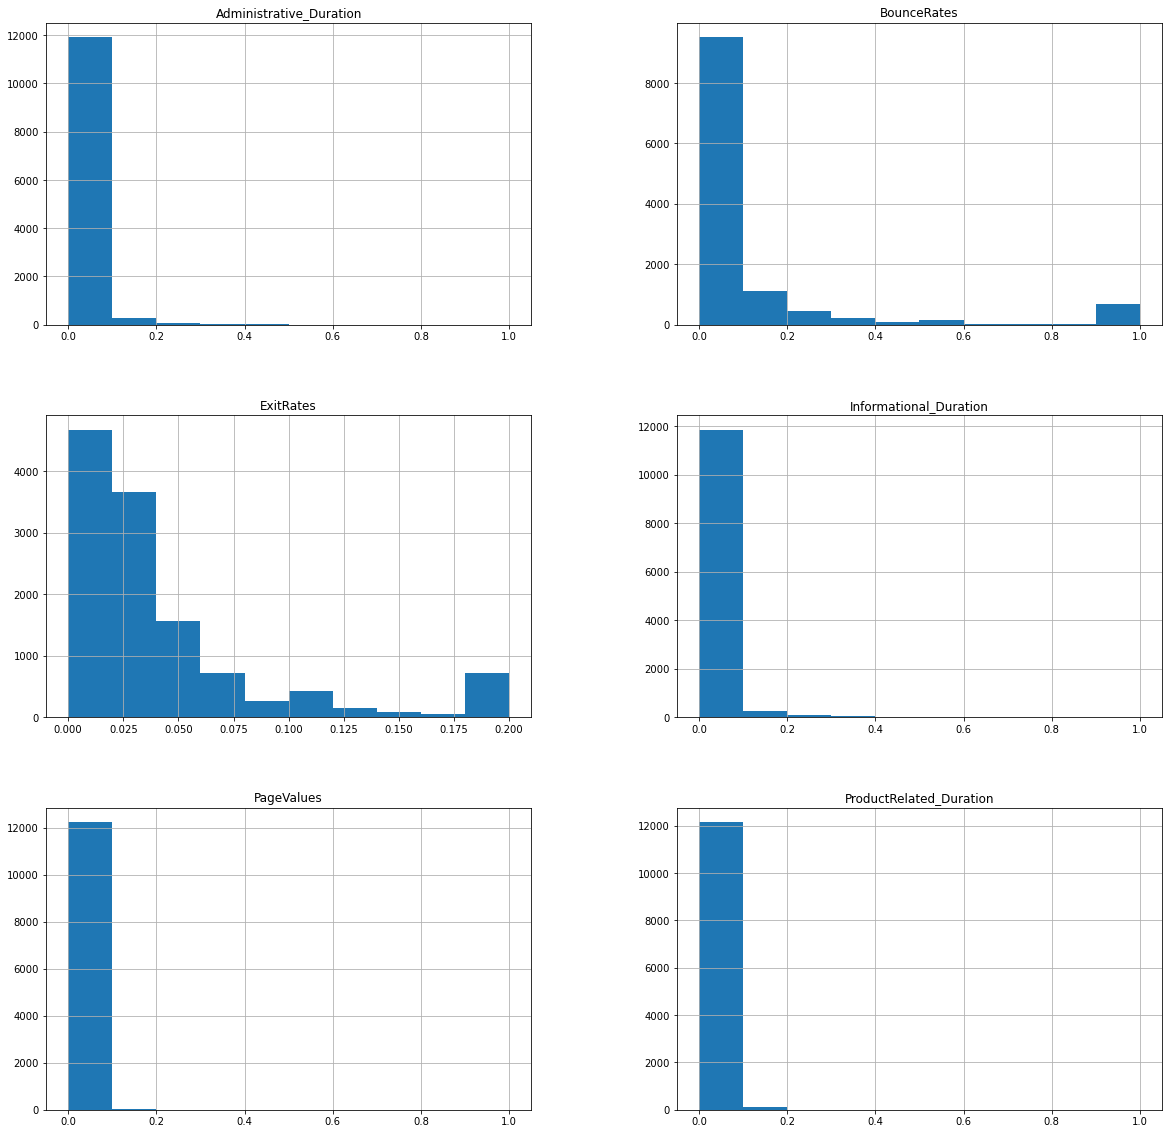

In [32]:
df.hist(column=num_col,figsize=(20,20))

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


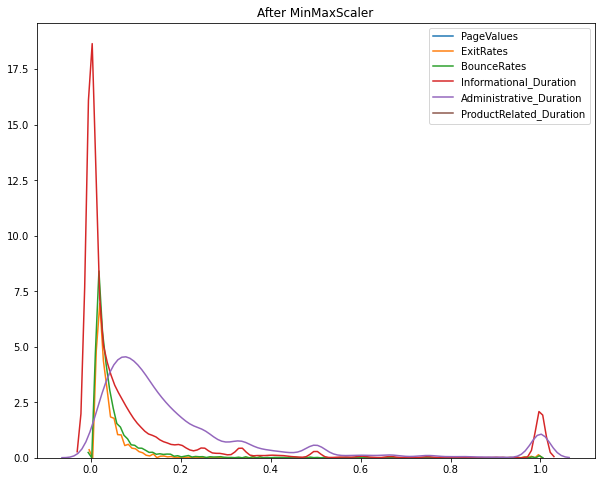

In [33]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)

df_mm = pd.DataFrame(df_mm, columns=num_col)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')


sns.kdeplot(df_mm['PageValues'], ax=ax1)
sns.kdeplot(df_mm['ExitRates'], ax=ax1)
sns.kdeplot(df_mm['BounceRates'], ax=ax1)
sns.kdeplot(df_mm['Informational_Duration'], ax=ax1)
sns.kdeplot(df_mm['Administrative_Duration'], ax=ax1)
sns.kdeplot(df_mm['ProductRelated_Duration'], ax=ax1)



In [34]:
X_2 = df.apply(lambda x: mm_scaler.fit_transform)

In [35]:
X_2

Administrative             <bound method TransformerMixin.fit_transform o...
Administrative_Duration    <bound method TransformerMixin.fit_transform o...
Informational              <bound method TransformerMixin.fit_transform o...
Informational_Duration     <bound method TransformerMixin.fit_transform o...
ProductRelated             <bound method TransformerMixin.fit_transform o...
ProductRelated_Duration    <bound method TransformerMixin.fit_transform o...
BounceRates                <bound method TransformerMixin.fit_transform o...
ExitRates                  <bound method TransformerMixin.fit_transform o...
PageValues                 <bound method TransformerMixin.fit_transform o...
SpecialDay                 <bound method TransformerMixin.fit_transform o...
Month                      <bound method TransformerMixin.fit_transform o...
OperatingSystems           <bound method TransformerMixin.fit_transform o...
Browser                    <bound method TransformerMixin.fit_transform o...

TypeError: '<=' not supported between instances of 'method' and 'method'

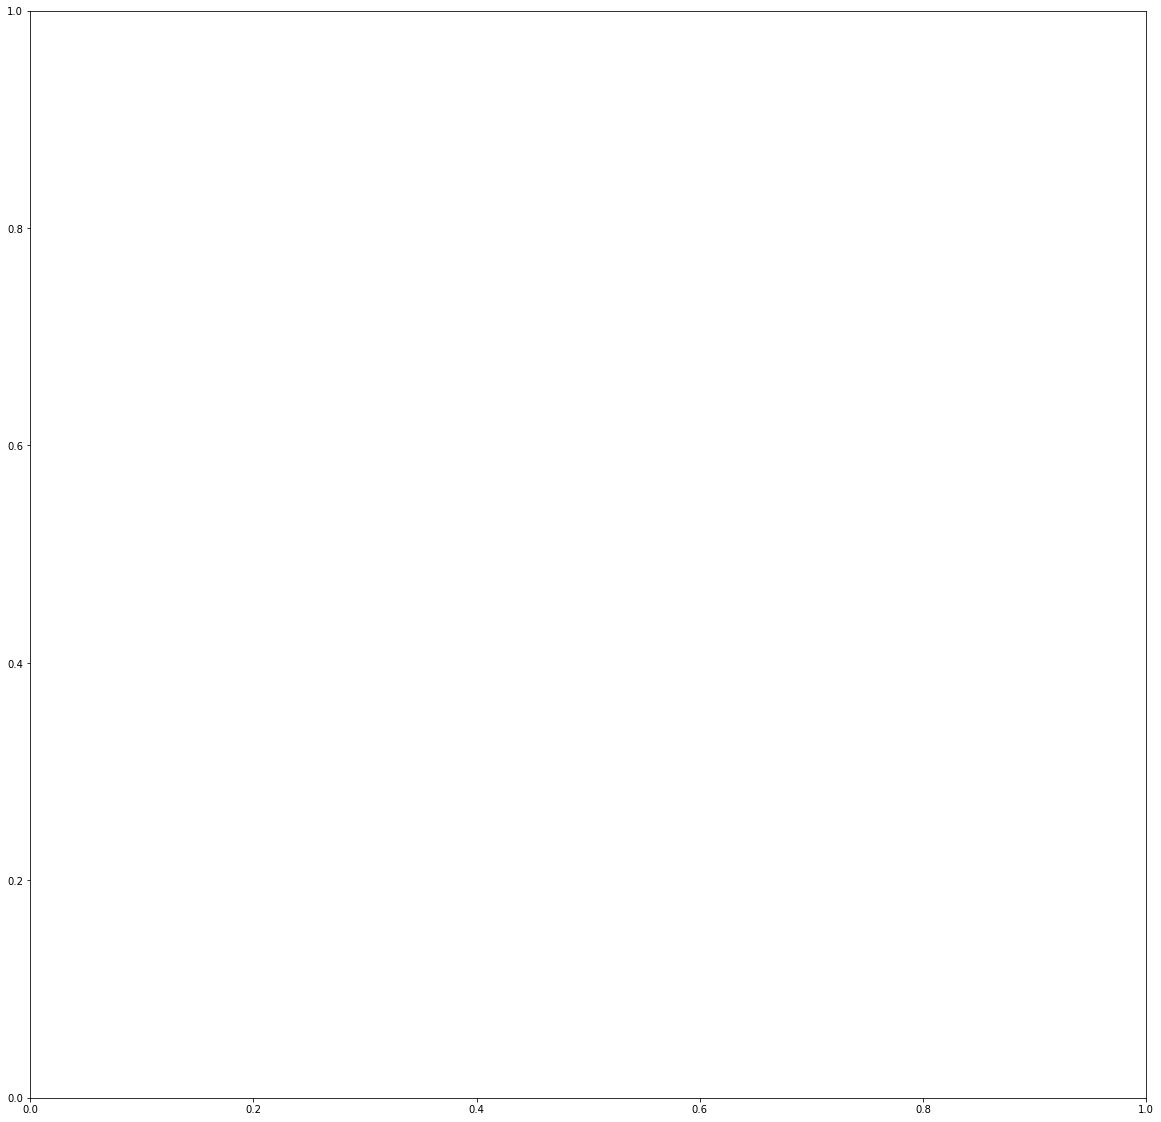

In [36]:
X_2.hist(column=num_col,figsize=(20,20))
df.hist(column=num_col,figsize=(20,20))

# MULTICOLLINEARITY

In statistics, the variance inflation factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone.[1] It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity. Cuthbert Daniel claims to have invented the concept behind the variance inflation factor, but did not come up with the name.[2]

In [37]:
df_vif=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']].fillna(0)

In [38]:
sales_corr = df.corr()
sales_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
Administrative,1.000000,0.327490,0.376772,0.216161,0.430750,-0.052618,-0.223643,-0.316340,0.008134,-0.095206,0.095356,-0.028155,-0.025185,-0.005625,-0.033851,0.026352,0.139035,0.028176,-0.021296,-0.022587
Administrative_Duration,0.327490,1.000000,0.122117,0.073453,0.124435,0.052310,-0.121020,-0.166512,0.003011,-0.060806,0.042356,-0.016180,0.002388,0.008321,-0.007618,0.007503,0.062308,0.065540,0.004193,-0.065199
Informational,0.376772,0.122117,1.000000,0.479249,0.374123,-0.024536,-0.116133,-0.163592,0.022854,-0.048382,0.062834,-0.017352,-0.038206,-0.029326,-0.034506,0.035286,0.095388,-0.053478,-0.021503,0.057460
Informational_Duration,0.216161,0.073453,0.479249,1.000000,0.210433,-0.009855,-0.069778,-0.098373,0.010560,-0.028534,0.038786,-0.011458,-0.013659,-0.024003,-0.023411,0.028790,0.063838,-0.041382,-0.013131,0.043637
ProductRelated,0.430750,0.124435,0.374123,0.210433,1.000000,-0.011076,-0.204652,-0.292343,-0.012318,-0.024319,0.155039,-0.007302,-0.013196,-0.038430,-0.043362,0.016114,0.158296,-0.123111,-0.036190,0.129142
ProductRelated_Duration,-0.052618,0.052310,-0.024536,-0.009855,-0.011076,1.000000,-0.090287,-0.089694,0.029562,0.006560,-0.023226,-0.005258,0.034755,0.020258,0.015816,-0.021530,0.033248,0.015067,-0.002577,-0.014155
BounceRates,-0.223643,-0.121020,-0.116133,-0.069778,-0.204652,-0.090287,1.000000,0.913462,-0.026162,0.073002,-0.065906,0.013796,-0.015877,-0.006846,0.078710,-0.046804,-0.150612,-0.139297,0.028207,0.129826
ExitRates,-0.316340,-0.166512,-0.163592,-0.098373,-0.292343,-0.089694,0.913462,1.000000,-0.032446,0.102854,-0.094003,0.029765,-0.004434,-0.008897,0.078919,-0.062778,-0.206813,-0.183612,0.034941,0.171656
PageValues,0.008134,0.003011,0.022854,0.010560,-0.012318,0.029562,-0.026162,-0.032446,1.000000,0.008803,-0.069664,-0.005922,-0.012522,-0.017655,-0.005600,0.017332,0.110123,0.027847,-0.006216,-0.025817
SpecialDay,-0.095206,-0.060806,-0.048382,-0.028534,-0.024319,0.006560,0.073002,0.102854,0.008803,1.000000,-0.257982,0.037458,0.003573,-0.016268,0.052214,-0.016789,-0.082453,-0.082918,-0.025787,0.087313


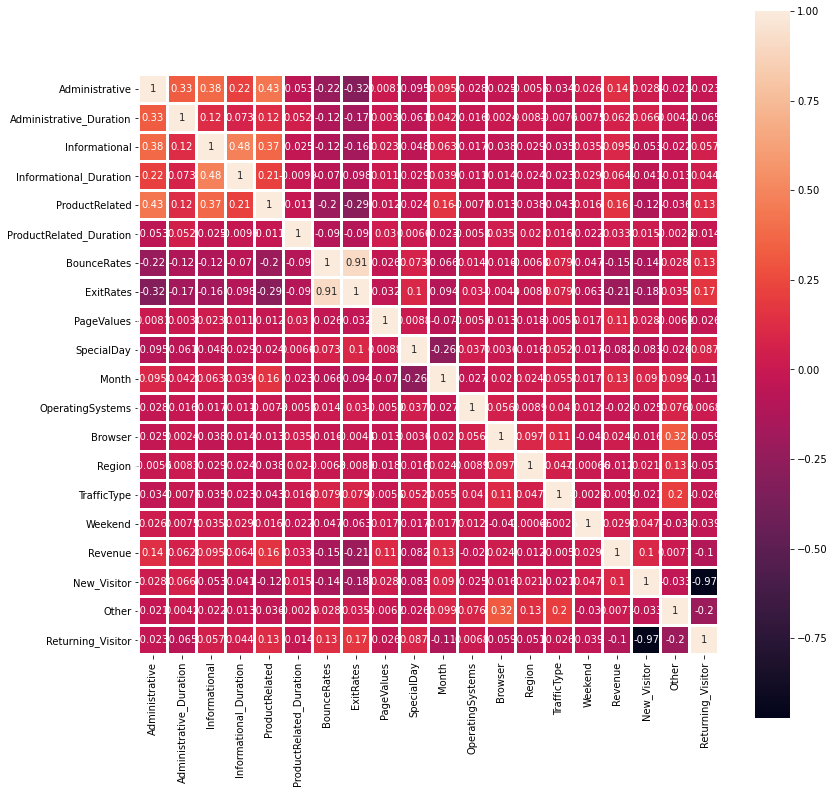

In [39]:
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(sales_corr, annot = True, square=True, linewidth = 2)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# the independent variables set 
X=df[["ExitRates","BounceRates","Informational_Duration","Administrative_Duration","ProductRelated_Duration","PageValues"]].fillna(0)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature       VIF
0                ExitRates  5.692161
1              BounceRates  5.468302
2   Informational_Duration  1.034329
3  Administrative_Duration  1.074769
4  ProductRelated_Duration  1.106076
5               PageValues  1.004525


In [41]:
#Droping Exit rates
X=df[["BounceRates","Informational_Duration","Administrative_Duration","ProductRelated_Duration","PageValues"]].fillna(0)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature       VIF
0              BounceRates  1.008512
1   Informational_Duration  1.027438
2  Administrative_Duration  1.056230
3  ProductRelated_Duration  1.045532
4               PageValues  1.003919


In [42]:
df.drop('ExitRates', axis=1, inplace=True)

# REFINE DATAFRAMES

In [43]:
df.to_csv("data/1.Collinearity_Scaler/df_0_out_maxmin.csv", index=False)

In [44]:
df2 = pd.read_csv("data/0.NaNs/df_mean_knn.csv")

In [45]:
df2.drop('ExitRates', axis=1, inplace=True)

In [46]:
for i in col:
    df2.loc[:, i] = minmaxscaler(df2[i].to_list())

In [47]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.000294,0.0,0.000455,1.0,0.000042,1.00,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000294,0.0,0.000455,2.0,0.002721,0.00,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.0,0.000000,1.0,0.000000,1.00,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000294,0.0,0.000455,2.0,0.020119,0.25,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000294,0.0,0.000455,10.0,0.026308,0.10,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df2.to_csv("data/1.Collinearity_Scaler/df_mean_knn_out_minmax.csv", index=False)

In [49]:
df3 = pd.read_csv("data/0.NaNs/df_nan.csv")

In [50]:
df3.drop('ExitRates', axis=1, inplace=True)

In [51]:
for i in col:
    df3.loc[:, i] = minmaxscaler(df3[i].to_list())

In [52]:
df3.to_csv("data/1.Collinearity_Scaler/df_nan_2.csv", index=False)